In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

# Load the data
# df = pd.read_csv('B.csv')
tickers = ["^NSEI"]
df = yf.download(tickers, start="2022-01-30", end="2023-03-27")["Close"]

data = df.reset_index()['Close']

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
data1 = scaler.fit_transform(np.array(data).reshape(-1, 1))
data = []

for i in data1:
    if ((np.isnan(i)) != True):
        data.append(i)
data=np.array(data).reshape(-1,1)

[*********************100%***********************]  1 of 1 completed


In [2]:
df

Date
2022-01-31    17339.849609
2022-02-01    17576.849609
2022-02-02    17780.000000
2022-02-03    17560.199219
2022-02-04    17516.300781
                  ...     
2023-03-20    16988.400391
2023-03-21    17107.500000
2023-03-22    17151.900391
2023-03-23    17076.900391
2023-03-24    16945.050781
Name: Close, Length: 287, dtype: float64

In [3]:
# Prepare the data for training
def prepare_data(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:(i+look_back)])
        Y.append(data[i+look_back])
    return np.array(X), np.array(Y)

look_back = 100
Z=[]
Z.append(data[(len(data)-look_back) : len(data)])
Z=np.array(Z)

In [4]:
test_X, test_Y = prepare_data(data, look_back)

In [5]:
# test_X

In [6]:
Z

array([[[0.79265405],
        [0.78408617],
        [0.80240136],
        [0.82674077],
        [0.81372549],
        [0.77712396],
        [0.86848514],
        [0.86264575],
        [0.88374549],
        [0.88552157],
        [0.86683728],
        [0.85653606],
        [0.81456357],
        [0.83850504],
        [0.84505541],
        [0.90667792],
        [0.91481955],
        [0.92902813],
        [0.94474305],
        [0.98461199],
        [1.        ],
        [0.96692231],
        [0.96832929],
        [0.95176186],
        [0.92838875],
        [0.94227042],
        [0.91023007],
        [0.91038658],
        [0.9418869 ],
        [0.9567493 ],
        [0.88701347],
        [0.84555271],
        [0.88859029],
        [0.8786021 ],
        [0.82568901],
        [0.80529969],
        [0.7142088 ],
        [0.77325934],
        [0.80670667],
        [0.80392157],
        [0.82338733],
        [0.79903404],
        [0.82522001],
        [0.83519488],
        [0.78131549],
        [0

In [7]:
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))
Z = np.reshape(Z, (Z.shape[0], Z.shape[1], 1))

In [8]:
from tensorflow.keras.models import load_model
model = load_model('combmodel.h5')
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 64)           16896     
                                                                 
 lstm_1 (LSTM)               (None, 100, 32)           12416     
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 32,465
Trainable params: 32,465
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Evaluate the model
# train_score = model.evaluate(train_X, train_Y, verbose=0)
test_score = model.evaluate(test_X, test_Y, verbose=0)
# print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, np.sqrt(train_score)))
print('Test Score: {:.8f} MSE ({:.2f} RMSE)'.format(test_score, np.sqrt(test_score)))

# Make predictions
# train_predict = model.predict(train_X)
test_predict = model.predict(test_X)
predict = model.predict(Z)
# scaler.scale_
# Inverse the scaling
scale_factor = 1/scaler.scale_
# train_predict = scaler.inverse_transform(train_predict)
# train_predict1=train_predict1*scale_factor
# train_Y = scaler.inverse_transform(train_Y)
# train_Y=train_Y*scale_factor
test_predict = scaler.inverse_transform(test_predict)
# test_predict1 = test_predict1*scale_factor
test_Y = scaler.inverse_transform(test_Y)
predict = scaler.inverse_transform(predict)
# test_Y = test_Y*scale_factor

# print(train_predict)
# print(train_Y)

Test Score: 0.00163620 MSE (0.04 RMSE)
1/1 [==============================] - 0s 65ms/step


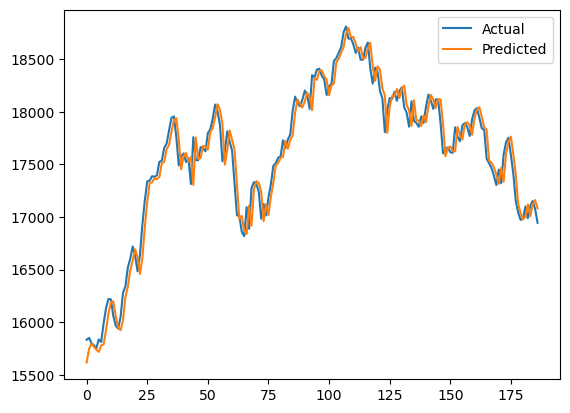

In [10]:
# Plot the results
import matplotlib.pyplot as plt
# plt.plot(train_Y.flatten(), label='Actual')
# plt.plot(train_predict.flatten(), label='Predicted')
# plt.legend()
# plt.show()

plt.plot(test_Y.flatten(), label='Actual')
plt.plot(test_predict.flatten(), label='Predicted')
plt.legend()
plt.show()

In [11]:
test_predict

array([[15616.081 ],
       [15745.694 ],
       [15797.499 ],
       [15765.188 ],
       [15738.422 ],
       [15716.893 ],
       [15778.448 ],
       [15788.601 ],
       [15924.808 ],
       [16082.705 ],
       [16189.067 ],
       [16198.148 ],
       [16054.949 ],
       [15952.059 ],
       [15922.646 ],
       [16018.933 ],
       [16239.017 ],
       [16337.1875],
       [16494.736 ],
       [16586.854 ],
       [16692.924 ],
       [16614.574 ],
       [16458.225 ],
       [16610.826 ],
       [16907.062 ],
       [17144.102 ],
       [17321.166 ],
       [17330.662 ],
       [17368.    ],
       [17360.72  ],
       [17379.885 ],
       [17511.518 ],
       [17522.947 ],
       [17647.906 ],
       [17685.016 ],
       [17810.035 ],
       [17923.18  ],
       [17939.957 ],
       [17738.895 ],
       [17454.281 ],
       [17581.639 ],
       [17608.82  ],
       [17529.125 ],
       [17570.344 ],
       [17304.639 ],
       [17756.154 ],
       [17551.95  ],
       [17561

In [12]:
test_Y

array([[15832.04980469],
       [15850.20019531],
       [15799.09960938],
       [15780.25      ],
       [15752.04980469],
       [15835.34960937],
       [15810.84960938],
       [15989.79980469],
       [16132.90039063],
       [16220.59960938],
       [16216.        ],
       [16058.29980469],
       [15966.65039063],
       [15938.65039063],
       [16049.20019531],
       [16278.5       ],
       [16340.54980469],
       [16520.84960938],
       [16605.25      ],
       [16719.44921875],
       [16631.        ],
       [16483.84960938],
       [16641.80078125],
       [16929.59960938],
       [17158.25      ],
       [17340.05078125],
       [17345.44921875],
       [17388.15039062],
       [17382.        ],
       [17397.5       ],
       [17525.09960938],
       [17534.75      ],
       [17659.        ],
       [17698.15039062],
       [17825.25      ],
       [17944.25      ],
       [17956.5       ],
       [17758.44921875],
       [17490.69921875],
       [17577.5       ],


In [13]:
predict

array([[16941.252]], dtype=float32)

## 